# Project 2: Random or not so random

### Task 1

In [19]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pylab as plt

In [20]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/np.sqrt(3),mu + sigma/np.sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([-0.06646982, -0.00817087, -0.01383311, -0.00798664,  0.05264678])

In [21]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [22]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y): # repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n) # empty array for histories 
    X = np.empty(n) # empty array for xk
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
        X[k] = x
    return x, f, X
        
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y): # no repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n)
    X = np.empty(n)
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
        X[k] = x
    return x, f, X

Final x using placement: 0.3085875380124302
Final x without using placement: 0.32375182742240366


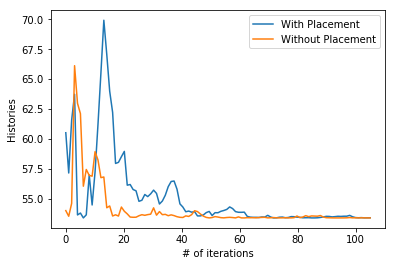

In [47]:
# Using y1
x_wr, wr_solu, X1 = IGD_wr_task1(y1)
print("Final x using placement:", x_wr)
x_wo, wo_solu, X2 = IGD_wo_task1(y1)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

In [49]:
# Average of x with placement
print(np.sum(X1[:5])/5) # first 5
print(np.sum(X1[5:10])/5) # next 5
print(np.sum(X1[10:15])/5) # next 5
print()
# Average of x without placement
print(np.sum(X2[:5])/5)
print(np.sum(X2[5:10])/5)
print(np.sum(X2[10:15])/5)

0.6319616328103466
0.4371845301351819
0.7648797007551805

0.5265667396342213
0.6090220139251018
0.576276468398294


Final x using placement: 0.5112762007565453
Final x without using placement: 0.5429577504287414


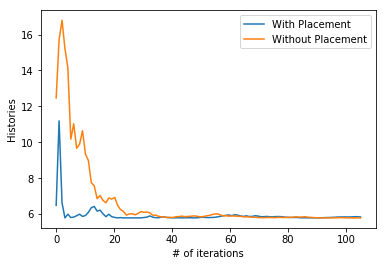

In [53]:
# Using y2
x_wr, wr_solu, X1 = IGD_wr_task1(y2)
print("Final x using placement:", x_wr)
x_wo, wo_solu, X2 = IGD_wo_task1(y2)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

In [54]:
X2 # all xk 

array([0.89965788, 0.97770846, 1.00085861, 0.96673575, 0.94189043,
       0.83206221, 0.85884999, 0.81478124, 0.82248818, 0.84704157,
       0.80326849, 0.78964697, 0.73648098, 0.72749227, 0.68606572,
       0.69728358, 0.67896871, 0.66987355, 0.68847412, 0.6840341 ,
       0.69059643, 0.65838581, 0.63685544, 0.62539284, 0.59783577,
       0.60805819, 0.60951023, 0.60029957, 0.61207585, 0.62492432,
       0.61987918, 0.62195097, 0.61698087, 0.59667764, 0.59717622,
       0.58469402, 0.57501147, 0.57096123, 0.56779229, 0.56429091,
       0.56605498, 0.57806298, 0.5809968 , 0.58654469, 0.57855696,
       0.58335892, 0.58430899, 0.58888516, 0.58618385, 0.57717916,
       0.57790737, 0.58749562, 0.59275781, 0.600102  , 0.60677921,
       0.60891984, 0.60072485, 0.59003658, 0.59181936, 0.58579367,
       0.58955303, 0.58751507, 0.58431449, 0.58433118, 0.5772387 ,
       0.57688132, 0.57514359, 0.5708307 , 0.57009303, 0.56150559,
       0.5583918 , 0.55764784, 0.56264788, 0.56461517, 0.56017

In [56]:
# Average of x with placement
print(np.sum(X1[:5])/5) # first 5
print(np.sum(X1[5:10])/5) # next 5
print(np.sum(X1[10:15])/5) # next 5
print()
# Average of x without placement
print(np.sum(X2[:5])/5)
print(np.sum(X2[5:10])/5)
print(np.sum(X2[10:15])/5)
print(np.sum(X2[70:75])/5) #average of x70 to x75

0.4425798215743292
0.5029544993164912
0.45768516648550905

0.957370227350854
0.8350446391512802
0.7485908849568709
0.5606951858938376


Ordering without placement is better becase it can give a better approximation to the true solution and it converges steadily. 
To prove that IGD_wo_task1 must converge to the mean value of y, we can see from above that the average of the first 5 xk using without placement method is already approximating to our mean value 0.5. By induction, we can simply assume xk will converge to 0.5 which implies xk+1 will also converge to 0.5.

### Task 2

In [57]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y, beta):
    x = 0
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y, beta):
    x = 0
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

Final x using placement: 1.0568710865270152
Final x without using placement: 1.1411197396244603


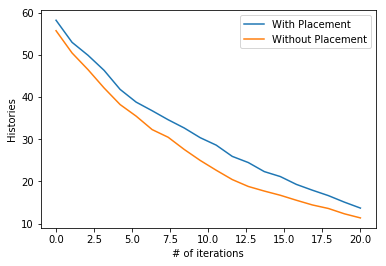

In [58]:
N = 20
beta = np.random.uniform(1,2,N)
y = 2
x_wr, wr_solu = IGD_wr_task2(y, beta)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wr_task2(y, beta)
print("Final x without using placement:", x_wo)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

Final x using placement: 1.9103109155532694
Final x without using placement: 1.9194002300957178


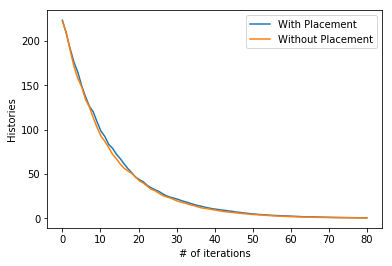

In [59]:
N = 80
beta = np.random.uniform(1,2,N)
y = 2
x_wr, wr_solu = IGD_wr_task2(y, beta)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wr_task2(y, beta)
print("Final x without using placement:", x_wo)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

The true solution should approach whichever value we pick for y. In this case, y = 2 and thus the final x is roughly less than 0.5 away from our y value using 20 iteration (N=20). When N=80, final x is even closer to y = 2. In both cases, without placement works better since it approaches faster to the true solution than with placement. We can also see from the plot that the histories of the second method is always beneath the first method. 

### Task 3

In [60]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [101]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A, xstar):
    n = A.shape[1]
    m = A.shape[0]
    x = np.zeros(n)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for i in range(3): # performing IGD for three rounds
        ordering = np.random.choice(n, n, replace=True)
        for k in range(n):
            x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
            f[k] = np.sum((A[k]@x - y[k])**2)
            conv[k] = LA.norm(x - xstar)
    return x, f, conv 

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A, xstar):
    n = A.shape[1]
    x = np.zeros(n)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for i in range(3): # performing IGD for three rounds
        ordering = np.random.choice(n, n, replace=False)
        for k in range(n):
            x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
            f[k] = np.sum((A[k]@x - y[k])**2)
            conv[k] = LA.norm(x - xstar)
    return x, f, conv

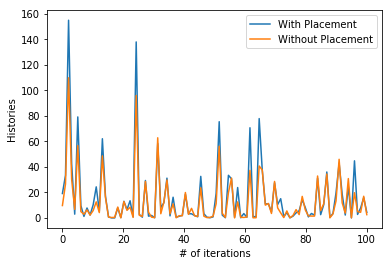

In [106]:
N = A.shape[1]
x_wr, wr_solu, wr_conv = IGD_wr_task3(y, A, xstar)
x_wo, wo_solu, wo_conv = IGD_wo_task3(y, A, xstar)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

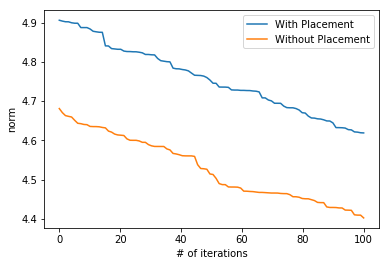

In [107]:
# Histories of norm(xk - xstar) 
X = np.linspace(0,N,N)
plt.plot(X,wr_conv)
plt.plot(X,wo_conv)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("norm")
plt.show()

Ordering without placement is still better because we can observe how the plot of with placement is always above the plot of without placement. This indicates the second method converges faster to the true solution than the first method. 